In [31]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_excel("IFB data.xlsx")

# Display the first few rows
print(df.head())

   City Month & Year   Zone Branch Brand Name Loading Type  \
0  AGRA   01.01.2018  north     UP    Brand A   TOPLOADING   
1  AGRA   01.01.2018  north     UP    Brand B   TOPLOADING   
2  AGRA   01.01.2018  north     UP    Brand C   TOPLOADING   
3  AGRA   01.01.2018  north     UP    Brand C   TOPLOADING   
4  AGRA   01.01.2018  north     UP    Brand D   TOPLOADING   

   Loading Capacity(kg)  Sales Units  Price  
0                   6.2            3   5600  
1                   6.0            5   5400  
2                   6.0           15   6000  
3                   6.0            4   6110  
4                   6.5            6   6140  


In [3]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values as necessary
df = df.dropna()  # or use df.fillna(value)

# Ensure correct data types
df['Sales Units'] = df['Sales Units'].astype(int)
df['Price'] = df['Price'].astype(float)
df['Loading Capacity(kg)'] = df['Loading Capacity(kg)'].astype(float)

City                    0
Month & Year            0
Zone                    0
Branch                  0
Brand Name              0
Loading Type            0
Loading Capacity(kg)    0
Sales Units             0
Price                   0
dtype: int64


In [4]:
# Total Sales Units per Brand
total_sales_units = df.groupby('Brand Name')['Sales Units'].sum().sort_values(ascending=False)
print(total_sales_units)

# Average Price per Brand
average_price = df.groupby('Brand Name')['Price'].mean().sort_values(ascending=False)
print(average_price)

# Total Revenue per Brand
df['Revenue'] = df['Sales Units'] * df['Price']
total_revenue = df.groupby('Brand Name')['Revenue'].sum().sort_values(ascending=False)
print(total_revenue)

Brand Name
Brand F    3386566
Brand G    3059592
IFB        1662026
Brand D    1355530
Brand H     537950
Brand K     415686
Brand A     352641
Brand E     202782
Brand J      58298
Brand P      54350
Brand S      37902
Brand L      36816
Brand O      30116
Brand M      15340
Brand N      11140
Brand B      10834
Brand C       9103
Brand Q       4296
Brand W       1388
Brand X       1306
Brand U        594
Brand V        558
Brand Z        344
Brand Y        218
Brand R        210
Brand T         66
Name: Sales Units, dtype: int32
Brand Name
Brand R    19271.333333
Brand L    19002.823716
Brand H    14904.134030
Brand F    14869.195085
IFB        14509.970876
Brand Z    13924.947368
Brand G    13699.472067
Brand E    10922.305774
Brand D    10812.720574
Brand Q    10563.307305
Brand K    10258.934618
Brand S    10253.754872
Brand J    10208.612597
Brand T    10151.625000
Brand A     9877.042493
Brand C     9670.902244
Brand N     9553.752475
Brand P     8687.820914
Brand W     8209.617

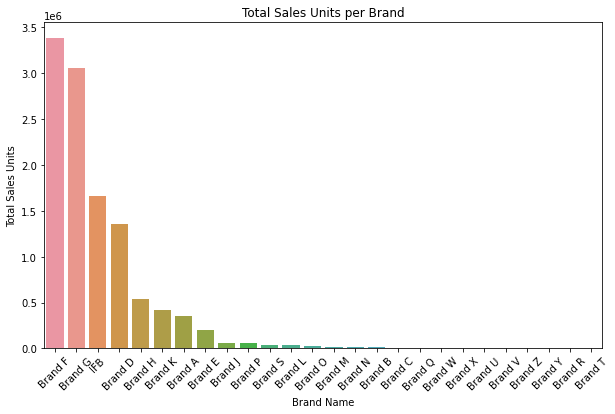

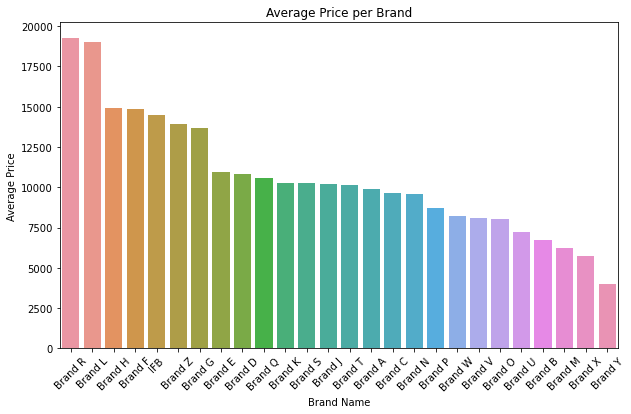

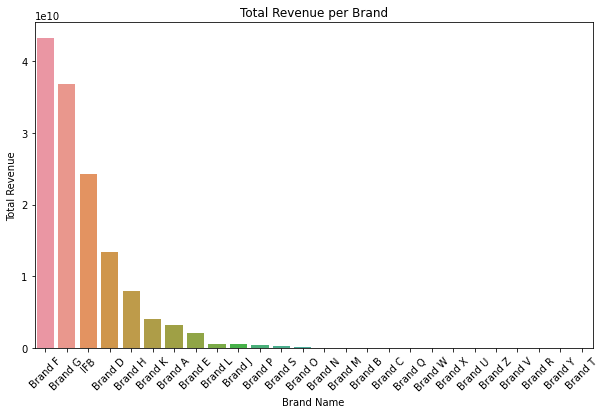

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total Sales Units per Brand
plt.figure(figsize=(10, 6))
sns.barplot(x=total_sales_units.index, y=total_sales_units.values)
plt.title('Total Sales Units per Brand')
plt.xlabel('Brand Name')
plt.ylabel('Total Sales Units')
plt.xticks(rotation=45)
plt.show()

# Average Price per Brand
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price.index, y=average_price.values)
plt.title('Average Price per Brand')
plt.xlabel('Brand Name')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

# Total Revenue per Brand
plt.figure(figsize=(10, 6))
sns.barplot(x=total_revenue.index, y=total_revenue.values)
plt.title('Total Revenue per Brand')
plt.xlabel('Brand Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Inspect the DataFrame
print("DataFrame Head:")
print(df.head())

# Convert 'Month & Year' to datetime with the correct format
try:
    df['Month & Year'] = pd.to_datetime(df['Month & Year'], format='%d.%m.%Y', errors='coerce')
    if df['Month & Year'].isnull().any():
        raise ValueError("Some dates could not be converted. Please check the 'Month & Year' format.")
except Exception as e:
    print(f"Error converting dates: {e}")
    df['Month & Year'] = pd.to_datetime(df['Month & Year'], errors='coerce')

# Check for any issues in date conversion
if df['Month & Year'].isnull().any():
    print("Date conversion issues found. Check 'Month & Year' format.")
    print(df[df['Month & Year'].isnull()])

# Extract Year from 'Month & Year'
df['Year'] = df['Month & Year'].dt.year

# Filter for years 2018 and 2019
df_filtered = df[df['Year'].isin([2018, 2019])]

DataFrame Head:
   City Month & Year   Zone Branch Brand Name Loading Type  \
0  AGRA   01.01.2018  north     UP    Brand A   TOPLOADING   
1  AGRA   01.01.2018  north     UP    Brand B   TOPLOADING   
2  AGRA   01.01.2018  north     UP    Brand C   TOPLOADING   
3  AGRA   01.01.2018  north     UP    Brand C   TOPLOADING   
4  AGRA   01.01.2018  north     UP    Brand D   TOPLOADING   

   Loading Capacity(kg)  Sales Units   Price  Revenue  
0                   6.2            3  5600.0  16800.0  
1                   6.0            5  5400.0  27000.0  
2                   6.0           15  6000.0  90000.0  
3                   6.0            4  6110.0  24440.0  
4                   6.5            6  6140.0  36840.0  


Market Share by City and Brand (2018-2019):
                City Brand Name  Year  Sales Units  City Total  \
0               AGRA    Brand A  2018          359       16594   
1               AGRA    Brand A  2019          470       17926   
2               AGRA    Brand B  2018          154       16594   
3               AGRA    Brand B  2019           64       17926   
4               AGRA    Brand C  2018          129       16594   
...              ...        ...   ...          ...         ...   
1993  VISHAKHAPATNAM    Brand P  2018          230       48356   
1994  VISHAKHAPATNAM    Brand P  2019          338       47704   
1995  VISHAKHAPATNAM    Brand S  2019           88       47704   
1996  VISHAKHAPATNAM        IFB  2018        10212       48356   
1997  VISHAKHAPATNAM        IFB  2019        12240       47704   

      Market Share (%)  
0             2.163433  
1             2.621890  
2             0.928046  
3             0.357023  
4             0.777389  
...          

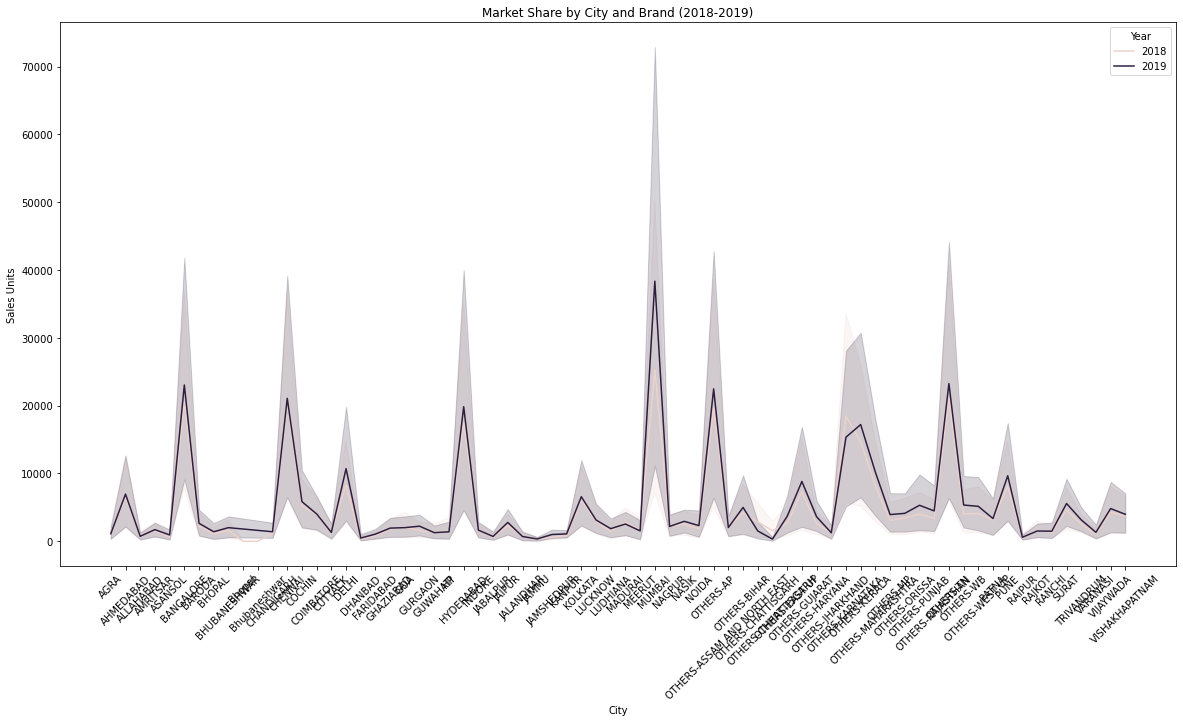

In [41]:
# Market Share by City and Brand
market_share_city_brand = df_filtered.groupby(['City', 'Brand Name', 'Year'])['Sales Units'].sum().reset_index()

# Calculate Market Share within each city
market_share_city_brand['City Total'] = market_share_city_brand.groupby(['City', 'Year'])['Sales Units'].transform('sum')
market_share_city_brand['Market Share (%)'] = (market_share_city_brand['Sales Units'] / market_share_city_brand['City Total']) * 100

print("Market Share by City and Brand (2018-2019):")
print(market_share_city_brand)

# Visualization: Market Share by City and Brand
# Adjusting the column name to use bracket notation
plt.figure(figsize=(20, 10))
sns.lineplot(data=market_share_city_brand, x='City', y='Sales Units', hue='Year')
plt.title('Market Share by City and Brand (2018-2019)')
plt.xticks(rotation=45)
plt.show()


Seasonal Trends Across Two Years:
     Month & Year            City           Branch  Sales Units
0      2018-01-01            AGRA               UP         1840
1      2018-01-01       AHMEDABAD          GUJARAT        10706
2      2018-01-01       ALLAHABAD               UP          838
3      2018-01-01        AMRITSAR  PUNJAB/HP/JAMMU         1600
4      2018-01-01         ASANSOL      WEST BENGAL          458
...           ...             ...              ...          ...
1607   2019-12-01      TRIVANDRUM           KERALA         4366
1608   2019-12-01        VARANASI               UP         1030
1609   2019-12-01       VIJAYWADA   ANDHRA PRADESH         2686
1610   2019-12-01  VISHAKHAPATNAM   ANDHRA PRADESH         2522
1611   2019-12-01  VISHAKHAPATNAM   Andhra Pradesh            2

[1612 rows x 4 columns]


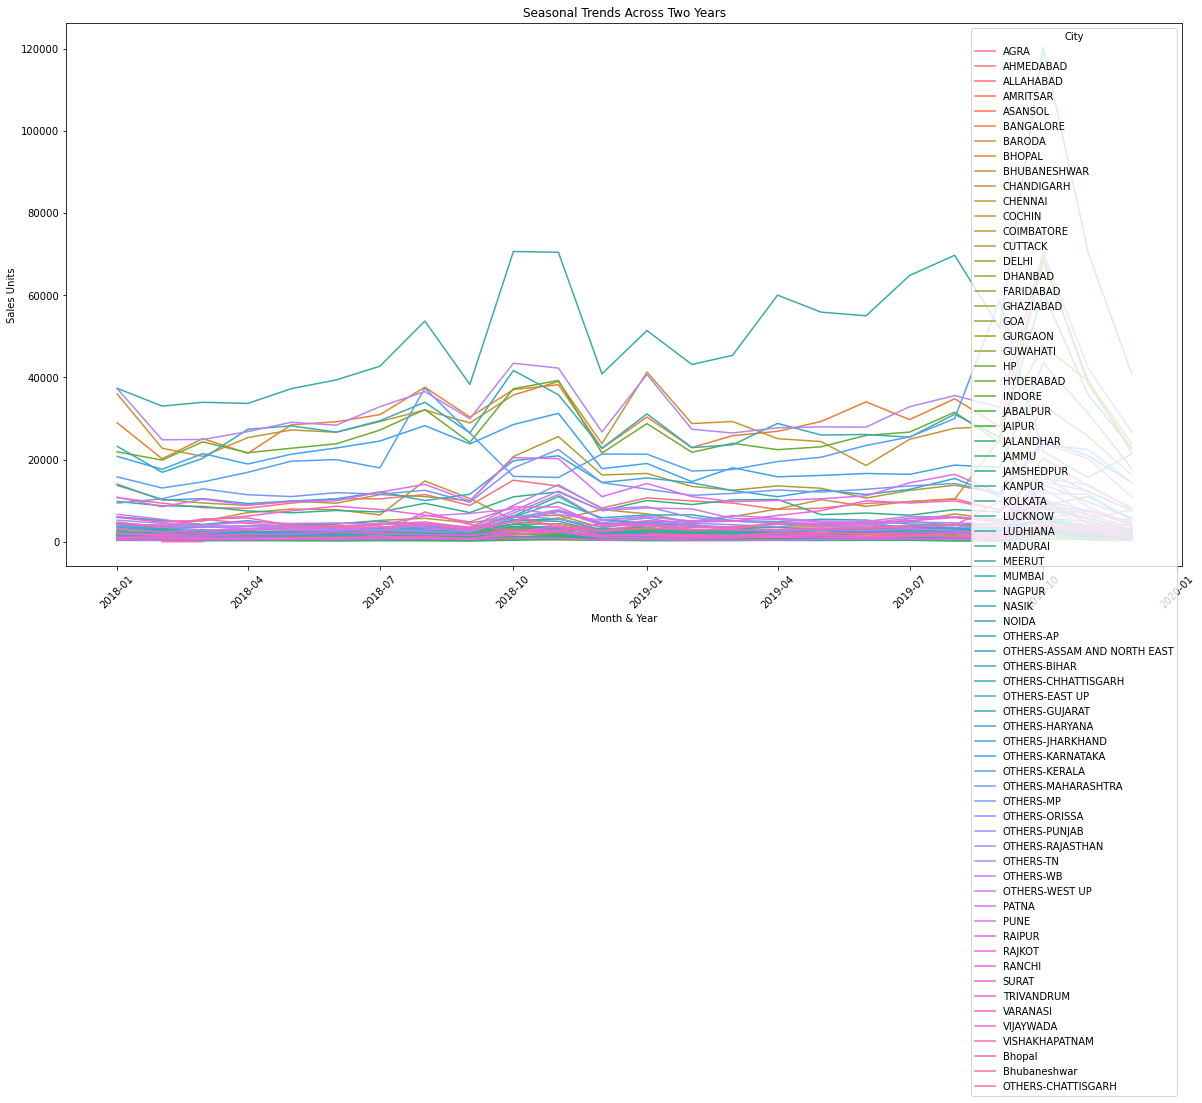

In [28]:
# Seasonal Trends Analysis
seasonal_trends = df_filtered.groupby(['Month & Year', 'City', 'Branch'])['Sales Units'].sum().reset_index()

print("\nSeasonal Trends Across Two Years:")
print(seasonal_trends)

# Visualization: Seasonal Trends
plt.figure(figsize=(20, 10))
sns.lineplot(data=seasonal_trends, x='Month & Year', y='Sales Units', hue='City')
plt.title('Seasonal Trends Across Two Years')
plt.xticks(rotation=45)
plt.show()


Price Trends by Brand and Loading Type (2018-2019):
   Brand Name  Loading Type  Year         Price
0     Brand A  FRONTLOADING  2018  13762.853333
1     Brand A  FRONTLOADING  2019  13141.351531
2     Brand A    TOPLOADING  2018   9169.735004
3     Brand A    TOPLOADING  2019   9321.930119
4     Brand B  FRONTLOADING  2018   9659.000000
..        ...           ...   ...           ...
86    Brand Z    TOPLOADING  2019  11920.272727
87        IFB  FRONTLOADING  2018  16324.521778
88        IFB  FRONTLOADING  2019  16463.243481
89        IFB    TOPLOADING  2018  10961.232697
90        IFB    TOPLOADING  2019  11158.959191

[91 rows x 4 columns]


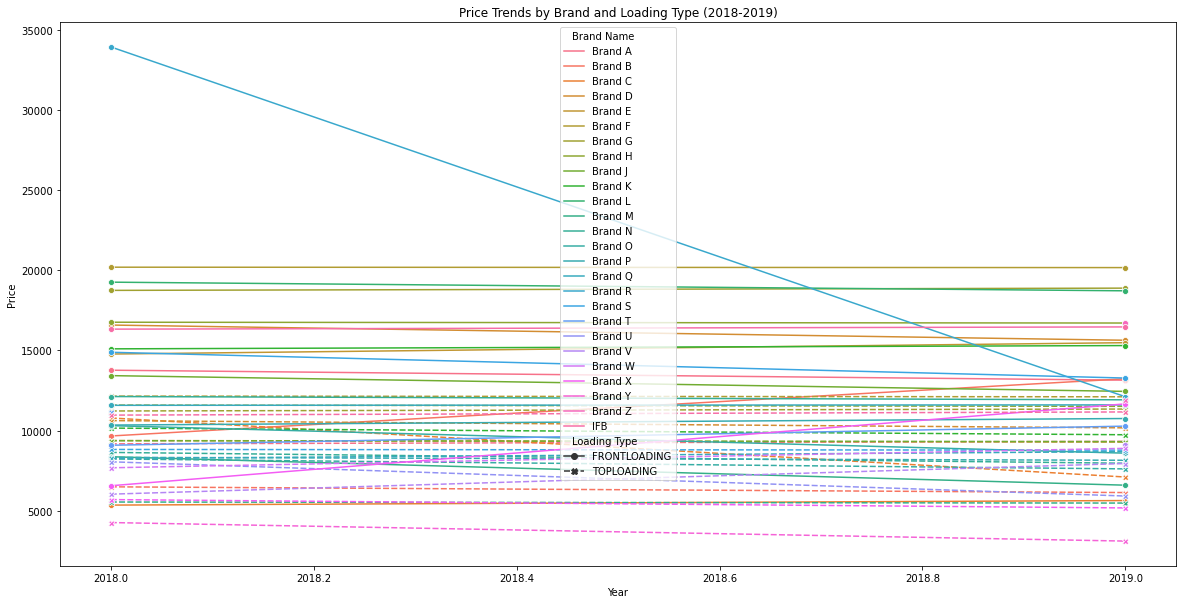

In [27]:
# Price Trends by Brand and Loading Type
price_trends = df_filtered.groupby(['Brand Name', 'Loading Type', 'Year'])['Price'].mean().reset_index()

print("\nPrice Trends by Brand and Loading Type (2018-2019):")
print(price_trends)

# Visualization: Price Trends by Brand and Loading Type
plt.figure(figsize=(20, 10))
sns.lineplot(data=price_trends, x='Year', y='Price', hue='Brand Name', style='Loading Type', markers=True)
plt.title('Price Trends by Brand and Loading Type (2018-2019)')
plt.show()


Price Sensitivity by Capacity and Year (2018-2019):
    Loading Capacity(kg)  Year         Price
0                    6.0  2018  10251.154749
1                    6.0  2019  10083.965526
2                    6.2  2018   5600.000000
3                    6.5  2018  11656.114150
4                    6.5  2019  11196.493799
5                    7.0  2018  13954.032831
6                    7.0  2019  13328.491341
7                    7.5  2018  14968.240526
8                    7.5  2019  13561.840117
9                    7.6  2019  11083.333333
10                   7.8  2018   8304.936759
11                   7.8  2019   8447.760000
12                   7.9  2019   5773.250000
13                   8.0  2018  19636.259332
14                   8.0  2019  18514.774479
15                   8.2  2018  12108.333333
16                   8.2  2019  12490.166667
17                   8.5  2018  18679.790393
18                   8.5  2019  18862.742304
19                   9.0  2018  21965.349352
20

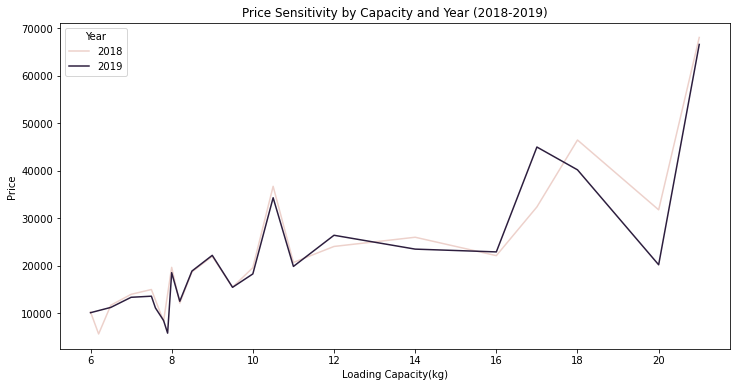

In [24]:
# Price Sensitivity by Capacity and Year
price_sensitivity = df_filtered.groupby(['Loading Capacity(kg)', 'Year'])['Price'].mean().reset_index()

print("\nPrice Sensitivity by Capacity and Year (2018-2019):")
print(price_sensitivity)

# Visualization: Price Sensitivity by Capacity and Year
plt.figure(figsize=(12, 6))
sns.lineplot(data=price_sensitivity, x='Loading Capacity(kg)', y='Price', hue='Year', markers=True)
plt.title('Price Sensitivity by Capacity and Year (2018-2019)')
plt.show()


Shifting Preferences by Capacity (2018-2019):
    Loading Capacity(kg)  Year  Sales Units
0                    6.0  2018      2274033
1                    6.0  2019      2196100
2                    6.2  2018            3
3                    6.5  2018      1407661
4                    6.5  2019      1665824
5                    7.0  2018       862014
6                    7.0  2019      1130136
7                    7.5  2018       170701
8                    7.5  2019       308584
9                    7.6  2019           30
10                   7.8  2018         7474
11                   7.8  2019         5456
12                   7.9  2019          148
13                   8.0  2018       334974
14                   8.0  2019       449314
15                   8.2  2018         2368
16                   8.2  2019         2692
17                   8.5  2018        29282
18                   8.5  2019        34918
19                   9.0  2018        70530
20                   9.0  201

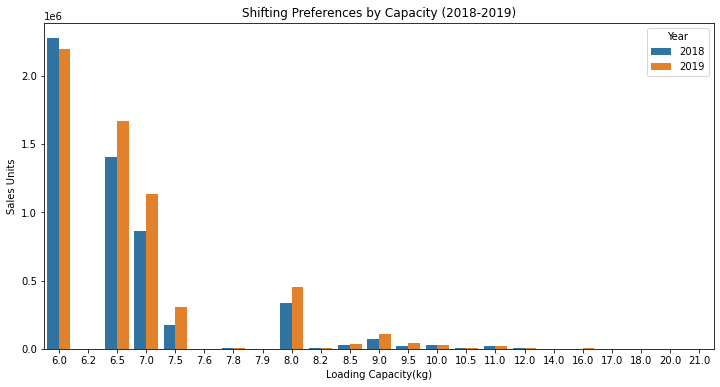

In [23]:
# Sales Units by Capacity and Year
capacity_preferences = df_filtered.groupby(['Loading Capacity(kg)', 'Year'])['Sales Units'].sum().reset_index()

print("\nShifting Preferences by Capacity (2018-2019):")
print(capacity_preferences)

# Visualization: Shifting Preferences by Capacity
plt.figure(figsize=(12, 6))
sns.barplot(data=capacity_preferences, x='Loading Capacity(kg)', y='Sales Units', hue='Year')
plt.title('Shifting Preferences by Capacity (2018-2019)')
plt.show()


Branch Performance Over Time (2018-2019):
             Branch  Year  Sales Units
0    ANDHRA PRADESH  2018       748202
1    ANDHRA PRADESH  2019       822186
2            ASSAM   2018        36238
3            ASSAM   2019        43670
4    Andhra Pradesh  2019            2
5             BIHAR  2018       106806
6             BIHAR  2019       121866
7      CHHATTISGARH  2018        28830
8      CHHATTISGARH  2019        31342
9             DELHI  2018       156446
10            DELHI  2019       192808
11              GOA  2018        29622
12              GOA  2019        34270
13          GUJARAT  2018       414588
14          GUJARAT  2019       465654
15          HARYANA  2018        79676
16          HARYANA  2019        94280
17        JHARKHAND  2018        42816
18        JHARKHAND  2019        52578
19        KARNATAKA  2018       626846
20        KARNATAKA  2019       637446
21           KERALA  2018       361758
22           KERALA  2019       451072
23   MADHYA PRADESH  

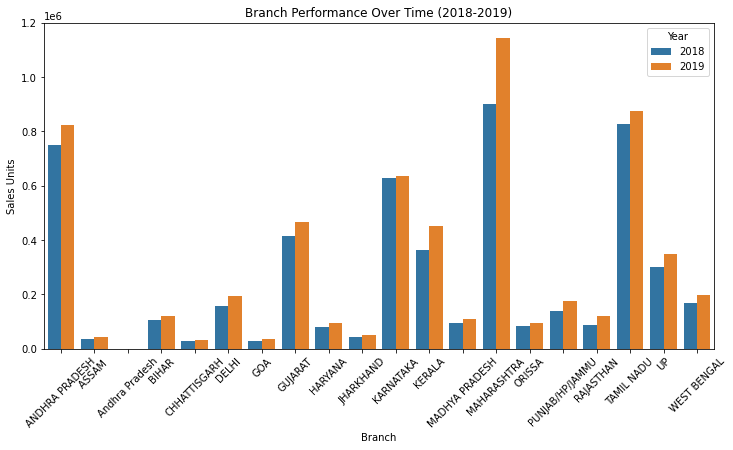

In [22]:
# Branch Performance Over Time
branch_performance = df_filtered.groupby(['Branch', 'Year'])['Sales Units'].sum().reset_index()

print("\nBranch Performance Over Time (2018-2019):")
print(branch_performance)

# Visualization: Branch Performance Over Time
plt.figure(figsize=(12, 6))
sns.barplot(data=branch_performance, x='Branch', y='Sales Units', hue='Year')
plt.title('Branch Performance Over Time (2018-2019)')
plt.xticks(rotation=45)
plt.show()

In [42]:
# Conclusion: 
# Brand F, G, IFB and D are the top 5 brands in sales unit
# as per average price per brand: Brand R, L, H, F, AND IFB are top 5 in average price.
# highest Total revenue per brand: Brand F, G, IFB, D, and H are in top 5.
# In Branch performances (2018-2019): Maharastra, Tamil Nadu, and Andhra Pradesh are in Top.
# In terms of loading capacity consumers drops in for 6.0 kg washing machines in 2019, 
# however for 6.5kg, 7.0kg, 8.0kg and 7.5 kg units sold more in 2019 comparision to 2018. 